In [1]:
import numpy as np, pandas as pd

In [2]:
df = pd.read_html('DailyWiseMarketArrivals.html')[-1]    # 
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4136,20/Sep/2021,BANGALORE,8130,800,1000,900
4137,21/Sep/2021,BANGALORE,9490,800,1000,900
4138,30/Sep/2021,BANGALORE,11350,1000,1200,1100
4139,01/Oct/2021,BANGALORE,15040,900,1100,1000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4140 non-null   object
 1   Market                4141 non-null   object
 2   Arrival(q)            4141 non-null   int64 
 3   Price Minimum (Rs/q)  4141 non-null   object
 4   Price Maximum (Rs/q)  4141 non-null   object
 5   Modal Price (Rs/q)    4141 non-null   object
dtypes: int64(1), object(5)
memory usage: 194.2+ KB


In [4]:
df = df.dropna()    # One way to remove the last row, as it contains an NaN value.
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4135,18/Sep/2021,BANGALORE,10210,600,800,700
4136,20/Sep/2021,BANGALORE,8130,800,1000,900
4137,21/Sep/2021,BANGALORE,9490,800,1000,900
4138,30/Sep/2021,BANGALORE,11350,1000,1200,1100


In [5]:
# To create a csv file from the dataframe, use:
# df.to_csv('Potato.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 4139
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4140 non-null   object
 1   Market                4140 non-null   object
 2   Arrival(q)            4140 non-null   int64 
 3   Price Minimum (Rs/q)  4140 non-null   object
 4   Price Maximum (Rs/q)  4140 non-null   object
 5   Modal Price (Rs/q)    4140 non-null   object
dtypes: int64(1), object(5)
memory usage: 226.4+ KB


#### We need Date and Modal price columns for forecasting, so we create a new dataframe for these two columns only

In [7]:
df.rename(columns = {'Date' : 'ds', 'Modal Price (Rs/q)' : 'y'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 4139
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds                    4140 non-null   object
 1   Market                4140 non-null   object
 2   Arrival(q)            4140 non-null   int64 
 3   Price Minimum (Rs/q)  4140 non-null   object
 4   Price Maximum (Rs/q)  4140 non-null   object
 5   y                     4140 non-null   object
dtypes: int64(1), object(5)
memory usage: 226.4+ KB


C:\Users\adity\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
df1 = df[['ds','y']]
df1

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4135,18/Sep/2021,700
4136,20/Sep/2021,900
4137,21/Sep/2021,900
4138,30/Sep/2021,1100


#### We also need to change the datatype of Date and Modal Price (Rs/q) columns. We need the dtypes datetime and int/float resp. for the two columns


In [9]:
df1['ds'] = pd.to_datetime(df1['ds'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 4139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4140 non-null   datetime64[ns]
 1   y       4140 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 97.0+ KB


<ipython-input-9-24f01b587f84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ds'] = pd.to_datetime(df1['ds'])


In [10]:
df1['y'] = df1['y'].astype(int)    # To covert Pandas object to other datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 4139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4140 non-null   datetime64[ns]
 1   y       4140 non-null   int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 80.9 KB


<ipython-input-10-27a178ba1356>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y'] = df1['y'].astype(int)    # To covert Pandas object to other datatypes


### Visualising the data

In [11]:
import matplotlib.pyplot as plt

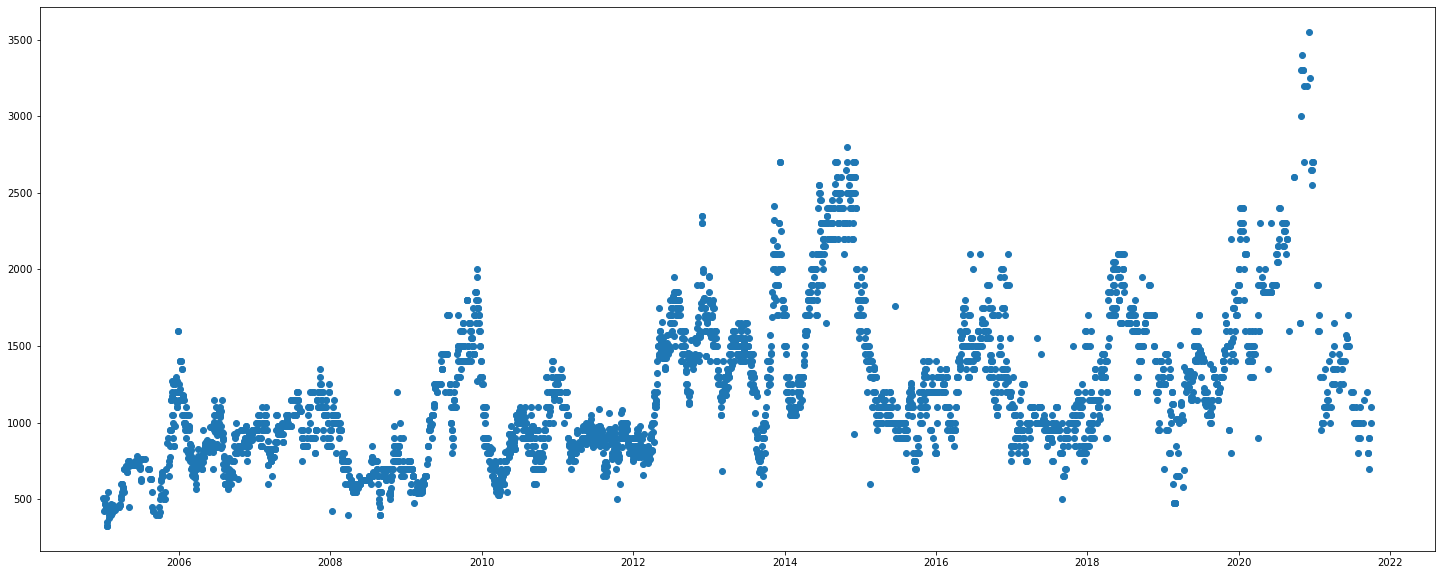

In [12]:
plt.figure(figsize = (25,10))
plt.scatter(df1['ds'], df1['y'])
plt.show()

### Removing outliers using np.where() method:

In [13]:
import numpy as np
df1['y'] = np.where(df1['y'] > 2750, np.nan, df1['y'])
df1

<ipython-input-13-e07ee71ea837>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y'] = np.where(df1['y'] > 2750, np.nan, df1['y'])


,ds,y
0,2005-01-01,510.0
1,2005-01-03,500.0
2,2005-01-05,500.0
3,2005-01-06,500.0
4,2005-01-07,425.0
...,...,...
4135,2021-09-18,700.0
4136,2021-09-20,900.0
4137,2021-09-21,900.0
4138,2021-09-30,1100.0


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 4139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4140 non-null   datetime64[ns]
 1   y       4129 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 97.0 KB


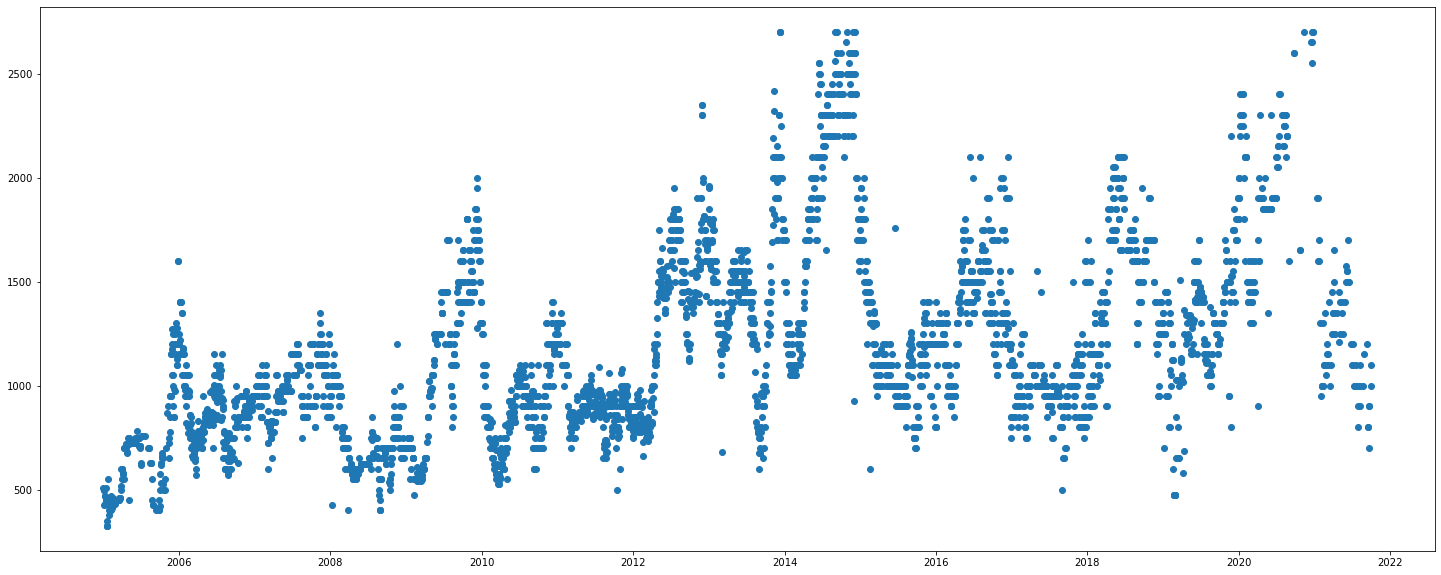

In [15]:
plt.figure(figsize = (25,10))
plt.scatter(df1['ds'], df1['y'])
plt.show()

In [16]:
import prophet

ModuleNotFoundError: No module named 'prophet'

In [ ]:
#op = fbprophet.Prophet()   #calling the algorithm 
op = prophet.Prophet(changepoint_prior_scale=1) #makes the model more robust and graph fits nicely
op.fit(df1)

In [ ]:
forecast = op.make_future_dataframe(periods = 365, freq = 'D')  #forecasting for the next 365 days with freq = D
forecast = op.predict(forecast)  #predicts the new forecast values

In [ ]:
op.plot(forecast,xlabel='Date',ylabel='Potato Price')
plt.show()